In [22]:
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
data = pd.DataFrame(columns=['times','frequency','temperature','mass_flow', 'volume_flow', 'mouth_pressure', 'offset', 'theta', 'radius', 'alpha', 'z', 'x', 'alpha_ref', 'z_ref', 'x_ref', 'flow_ref'])

paths = ["w_ct/w_7_5(2).csv"] #, "w_ct/w_6_25.csv", "w_ct/w_6_5.csv", "w_ct/w_6_75.csv", "w_ct/w_7_0.csv", "w_ct/w_7_25.csv", "w_ct/w_7_5.csv", "w_ct/w_7_75.csv", "w_ct/w_8_0.csv", "w_ct/w_8_25.csv", "w_ct/w_8_5.csv", "w_ct/w_8_75.csv", "w_ct/w_9_0.csv"]
for path in paths:
    new_data = pd.read_csv(path)
    data = data.append(new_data, ignore_index=True)

/tmp/ipykernel_24561/2431187911.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_data, ignore_index=True)


In [33]:
S = 25 # mm2
f1 = 392 # Hz
data['jet_velocity'] = (data['volume_flow']/60000) / (S*10**-6) # m/s
data['reduced_jet_velocity'] = data['jet_velocity'] / ((data['radius']+0)/1000 * f1) # m/s / m/s
data['dimensionless_freq'] = data['frequency'] / f1

Text(0.5, 1.0, 'W fixed results')

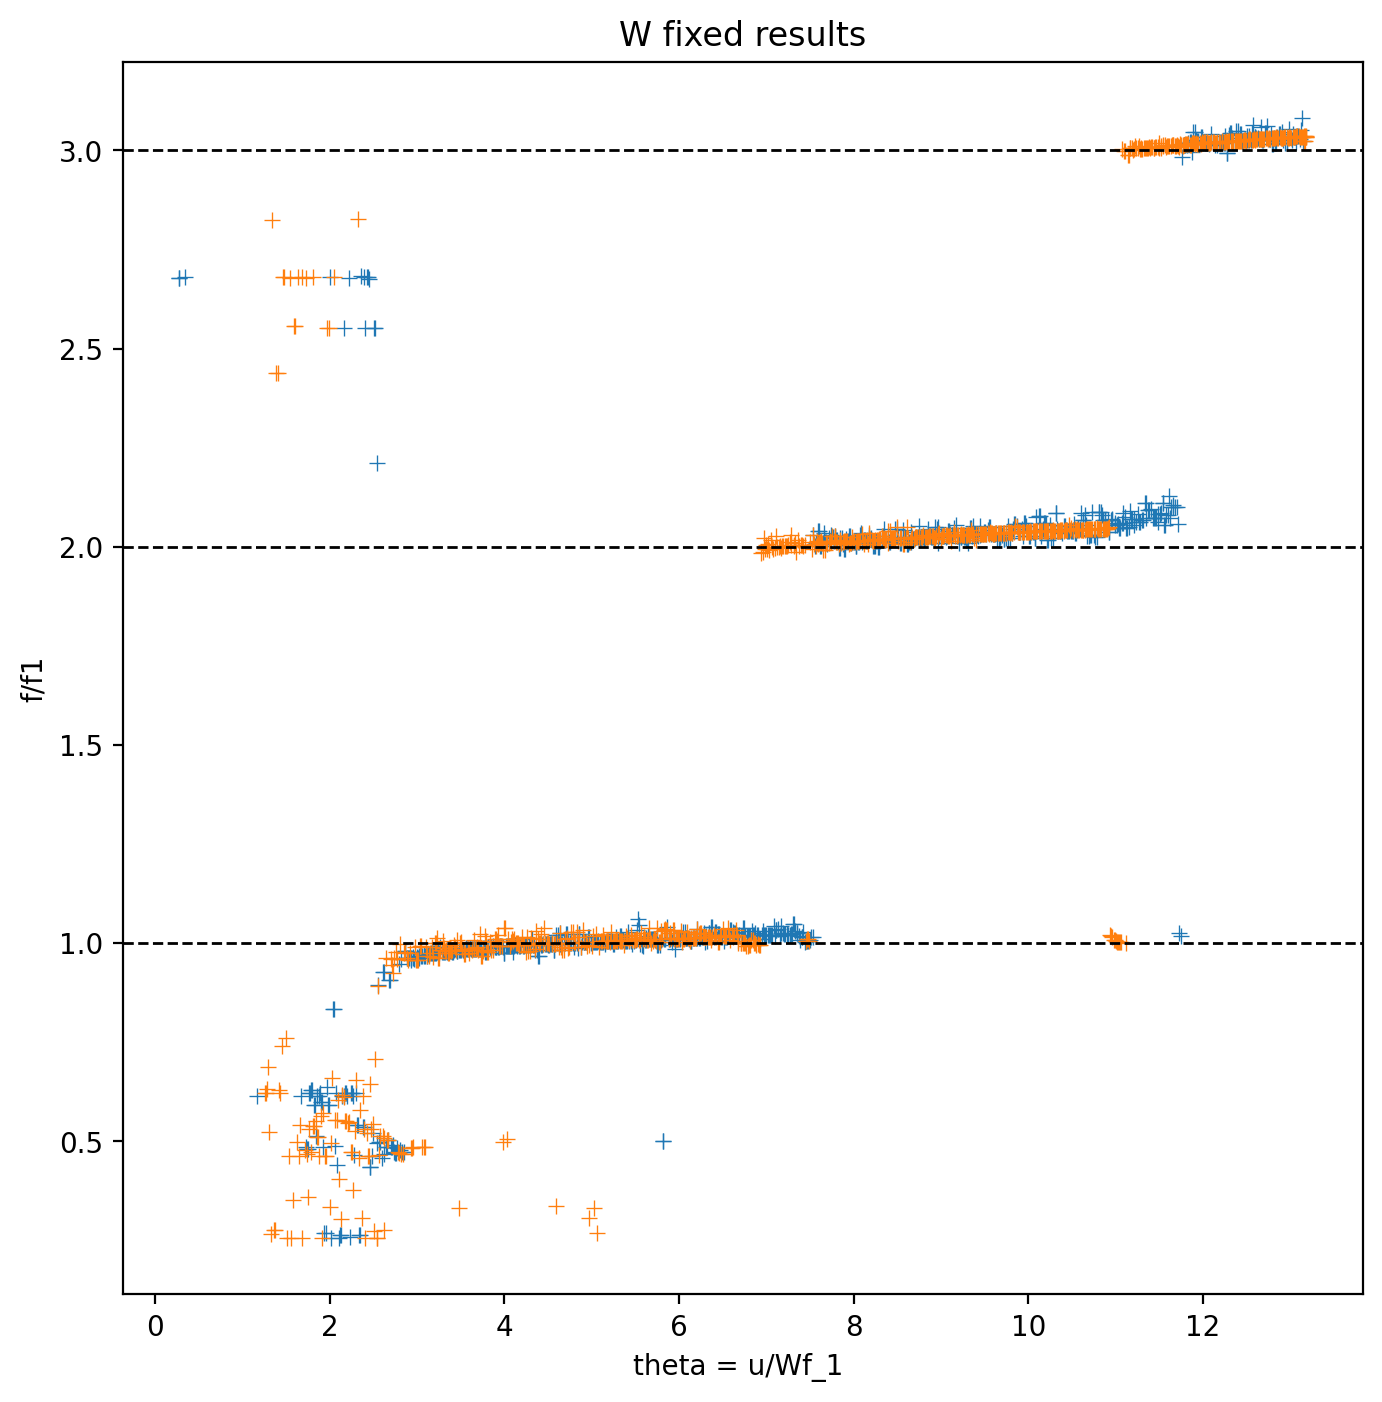

In [34]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(200)

sns.scatterplot(data=data.loc[(data['dimensionless_freq'] < 5) & (data['times'] < 60)], x="reduced_jet_velocity", y="dimensionless_freq", marker="+")

sns.scatterplot(data=data.loc[(data['dimensionless_freq'] < 5) & (data['times'] > 60)], x="reduced_jet_velocity", y="dimensionless_freq", marker="+")

plt.axhline(1, color='black', lw=1, linestyle='--')
plt.axhline(2, color='black', lw=1, linestyle='--')
plt.axhline(3, color='black', lw=1, linestyle='--')

plt.xlabel("theta = u/Wf_1 ")
plt.ylabel("f/f1")
plt.title("W fixed results")

<AxesSubplot:xlabel='volume_flow', ylabel='mouth_pressure'>

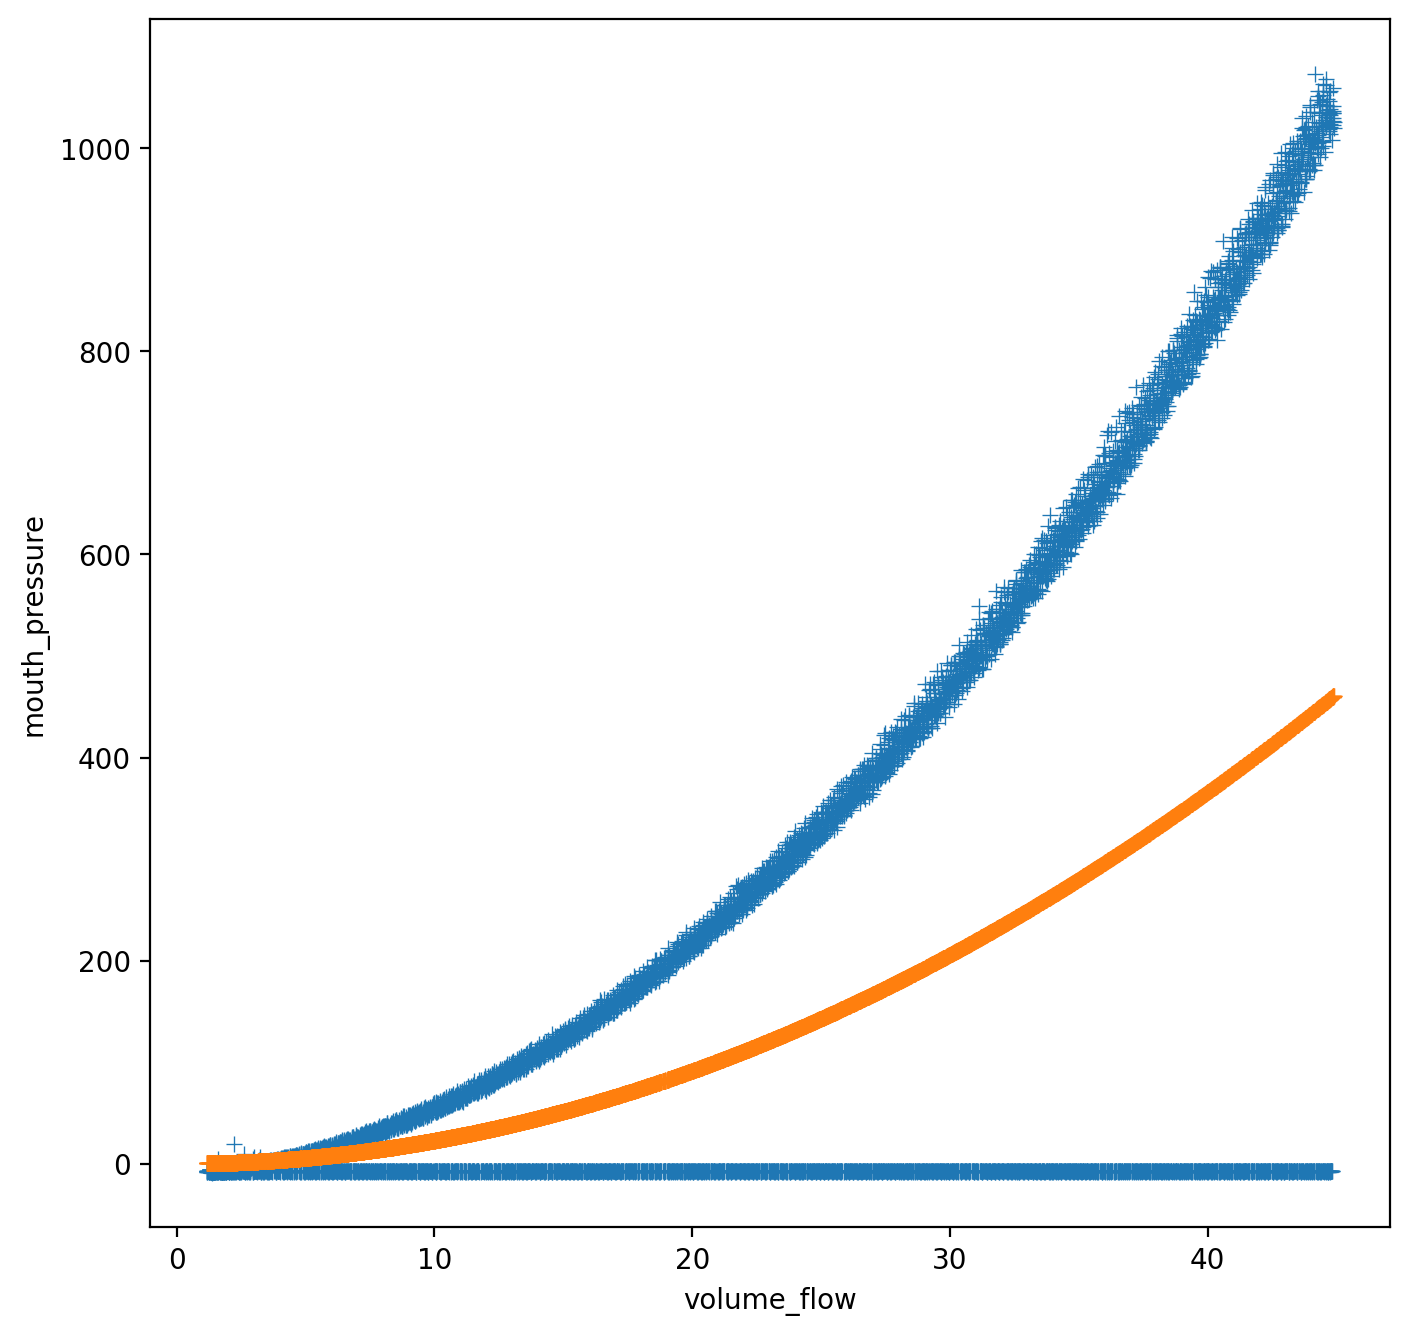

In [41]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(200)

data['calculated_preasure'] = ((data['volume_flow']/60000) / (S*10**-6))**2 *1.2/2
sns.scatterplot(data=data.loc[data['dimensionless_freq'] < 5], x="volume_flow", y="mouth_pressure", marker="+")
sns.scatterplot(data=data.loc[data['dimensionless_freq'] < 5], x="volume_flow", y="calculated_preasure", marker="+")


In [8]:
data2 = pd.DataFrame(columns=['times','frequency','temperature','mass_flow', 'volume_flow', 'mouth_pressure', 'offset', 'theta', 'radius', 'alpha', 'z', 'x', 'alpha_ref', 'z_ref', 'x_ref', 'flow_ref'])

paths2 = ["flow_ct/flow_8.csv", "flow_ct/flow_9.csv", "flow_ct/flow_10.csv", "flow_ct/flow_11.csv", "flow_ct/flow_12.csv", "flow_ct/flow_13.csv", "flow_ct/flow_14.csv", "flow_ct/flow_15.csv", "flow_ct/flow_16.csv", "flow_ct/flow_17.csv", "flow_ct/flow_18.csv", "flow_ct/flow_19.csv","flow_ct/flow_20.csv", "flow_ct/flow_21.csv", "flow_ct/flow_22.csv", "flow_ct/flow_23.csv", "flow_ct/flow_24.csv","flow_ct/flow_25.csv", "flow_ct/flow_26.csv", "flow_ct/flow_27.csv", "flow_ct/flow_28.csv", "flow_ct/flow_28.csv", "flow_ct/flow_29.csv", "flow_ct/flow_30.csv"]
for path in paths2:
    new_data = pd.read_csv(path)
    data2 = data2.append(new_data, ignore_index=True)

In [9]:
S = 27 # mm2
f1 = 392 # Hz
data2['jet_velocity'] = (data2['volume_flow']/60000) / (S*10**-6) # m/s
data2['reduced_jet_velocity'] = data2['jet_velocity'] / (data2['radius']/1000 * f1) # m/s / m/s
data2['dimensionless_freq'] = data2['frequency'] / f1

Text(0.5, 1.0, 'Flow fixed results')

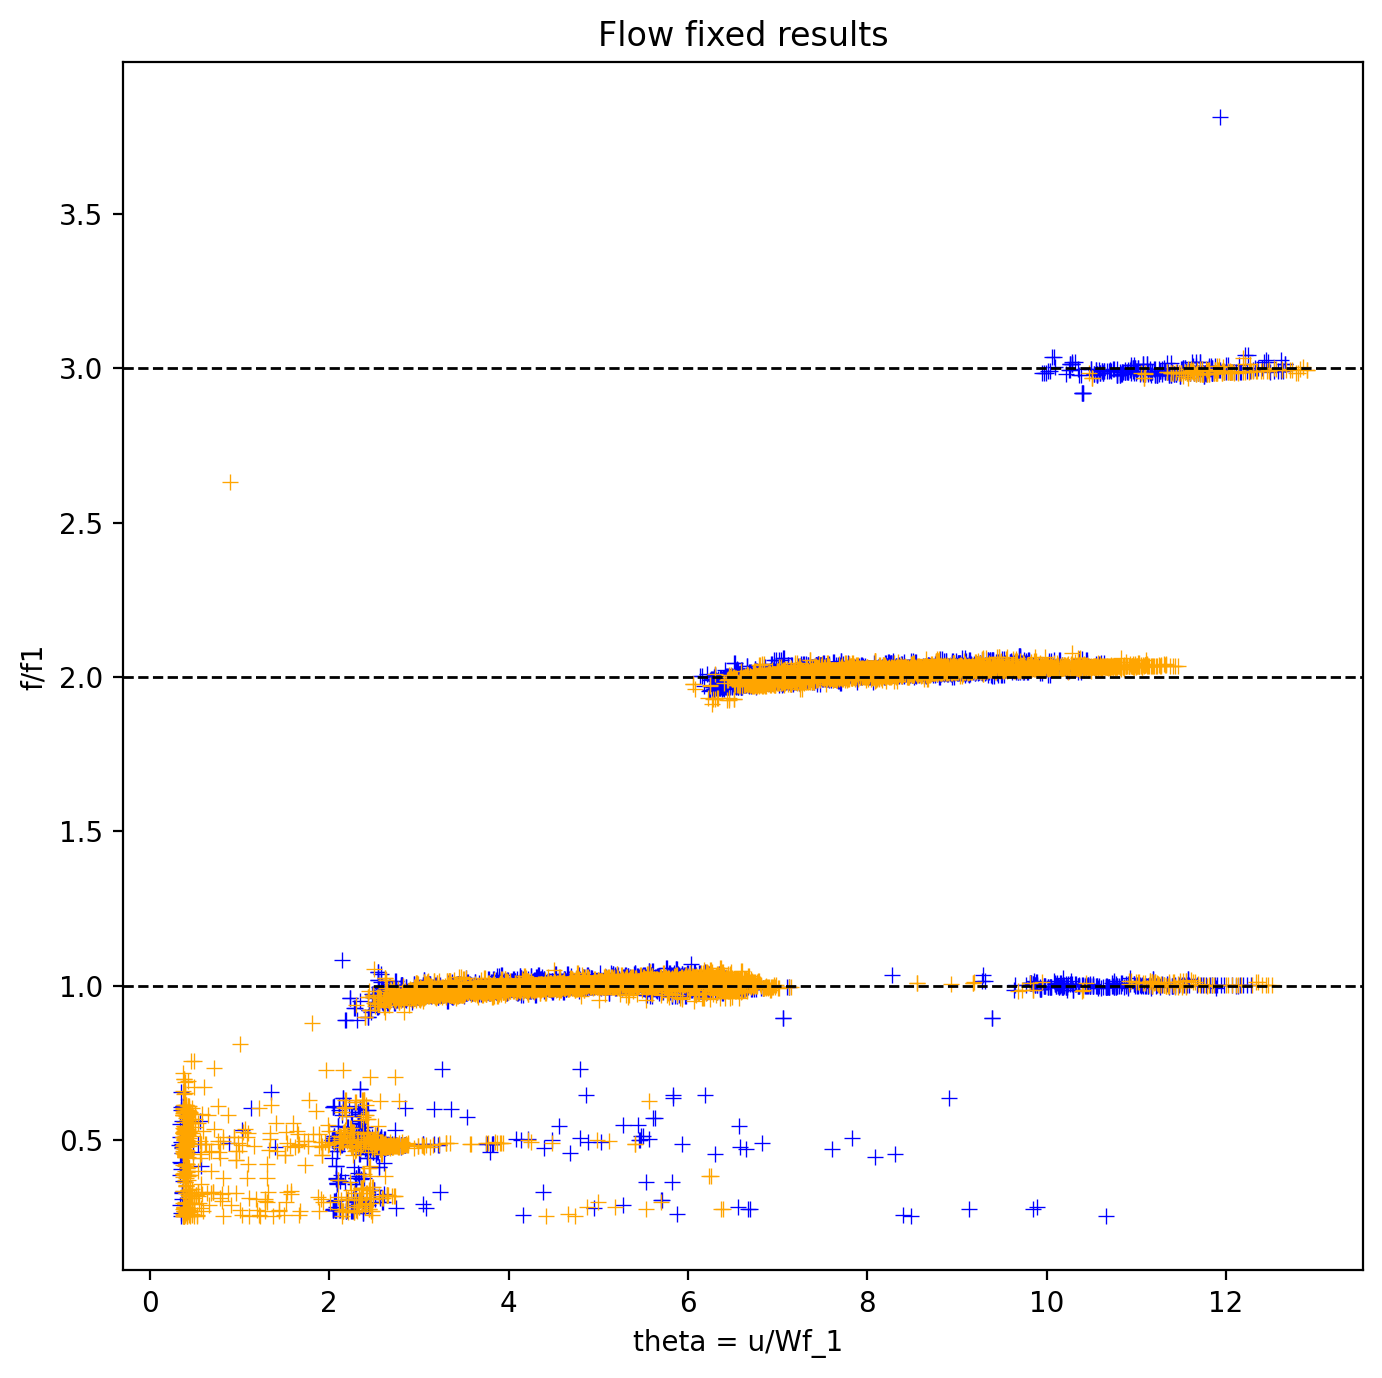

In [44]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(200)

#sns.scatterplot(data=data2.loc[data2['dimensionless_freq'] < 3.5], x="reduced_jet_velocity", y="dimensionless_freq", marker="+", color='C1')
sns.scatterplot(data=data2.loc[(data2['dimensionless_freq'] < 5) & (data2['times'] < 15)], x="reduced_jet_velocity", y="dimensionless_freq", marker="+", color="blue")

sns.scatterplot(data=data2.loc[(data2['dimensionless_freq'] < 5) & (data2['times'] > 15)], x="reduced_jet_velocity", y="dimensionless_freq", marker="+", color="orange")

plt.axhline(1, color='black', lw=1, linestyle='--')
plt.axhline(2, color='black', lw=1, linestyle='--')
plt.axhline(3, color='black', lw=1, linestyle='--')

plt.xlabel("theta = u/Wf_1 ")
plt.ylabel("f/f1")
plt.title("Flow fixed results")

Text(0.5, 1.0, 'Combined results')

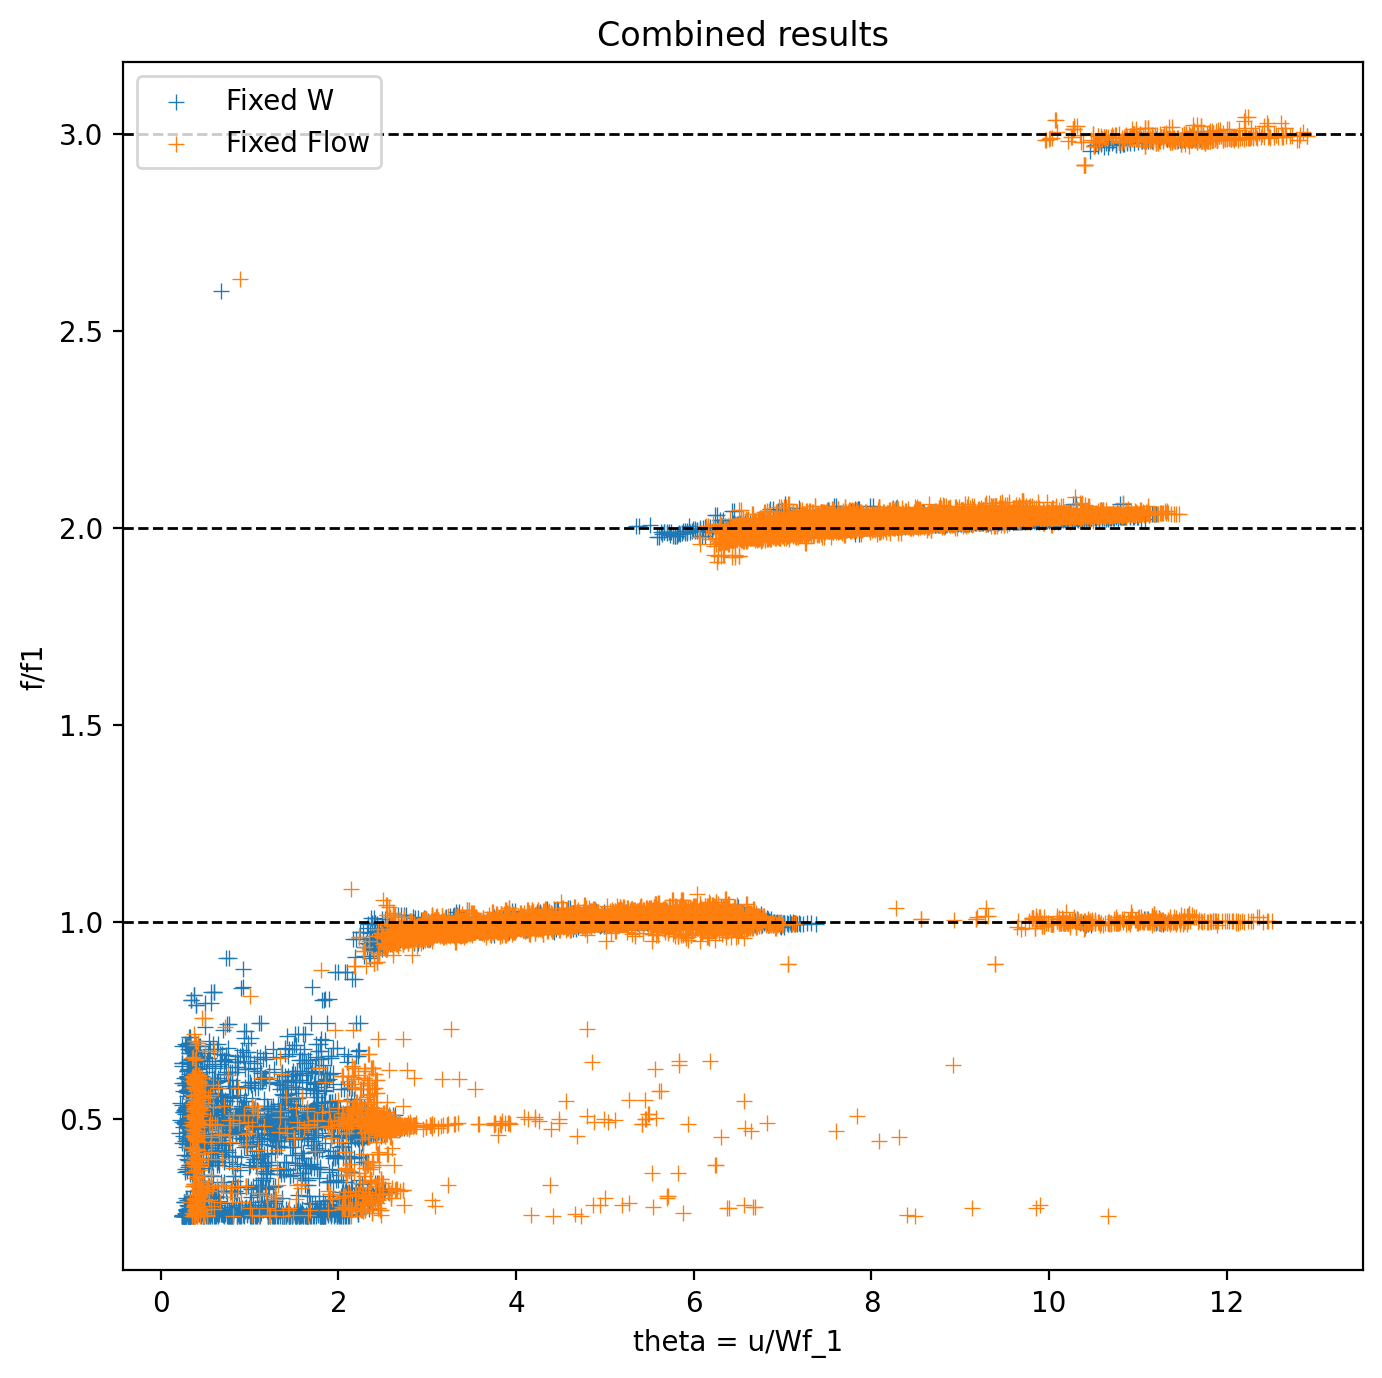

In [16]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(200)

sns.scatterplot(data=data.loc[data['dimensionless_freq'] < 3.5], x="reduced_jet_velocity", y="dimensionless_freq", marker="+", label="Fixed W")
sns.scatterplot(data=data2.loc[data2['dimensionless_freq'] < 3.5], x="reduced_jet_velocity", y="dimensionless_freq", marker="+", label="Fixed Flow")

plt.axhline(1, color='black', lw=1, linestyle='--')
plt.axhline(2, color='black', lw=1, linestyle='--')
plt.axhline(3, color='black', lw=1, linestyle='--')

plt.legend(loc='upper left')
plt.xlabel("theta = u/Wf_1 ")
plt.ylabel("f/f1")
plt.title("Combined results")

In [84]:
combined_data = data.append(data2, ignore_index=True)

Text(0.5, 1.0, 'Combined results')

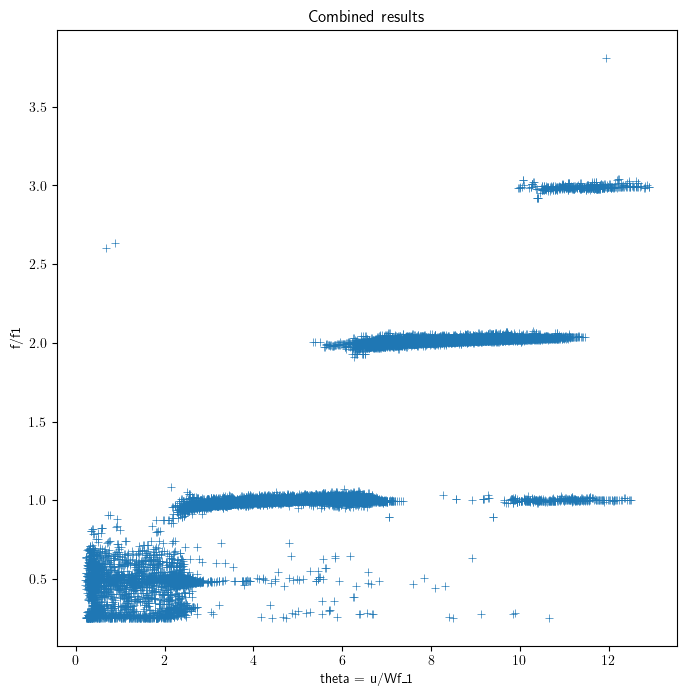

In [85]:
fig = plt.gcf()
fig.set_size_inches(8, 8)

sns.scatterplot(data=combined_data.loc[combined_data['dimensionless_freq'] < 5], x="reduced_jet_velocity", y="dimensionless_freq", marker="+")
plt.xlabel("theta = u/Wf_1 ")
plt.ylabel("f/f1")
plt.title("Combined results")

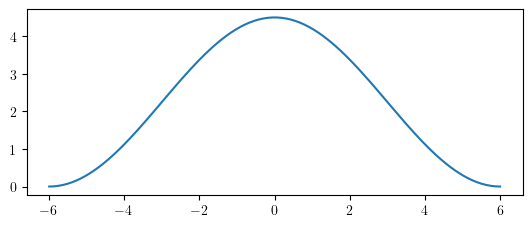

In [88]:
import numpy as np

h = 4.5
w_hl = 6
x = np.linspace(-w_hl,w_hl,100)
y = h * np.cos(np.pi*x/(2*w_hl))**2

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(x, y)